<a href="https://colab.research.google.com/github/Nhattu0102/Final-Project-Proposal/blob/main/Project_Proposal_(Final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Input data

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from io import StringIO
from sklearn.metrics import roc_auc_score

In [5]:
#Load data
from google.colab import files
uploaded = files.upload()

Saving online_course_engagement_data.csv to online_course_engagement_data.csv


## Data Overview

In [7]:
df = pd.read_csv('online_course_engagement_data.csv')
df.head(10)

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0
5,8650,Health,79.466129,12,7,70.233329,76.484023,0,1
6,4321,Health,78.908724,10,2,86.836533,22.588896,1,0
7,4589,Business,12.068237,16,3,61.553646,27.410991,1,0
8,4215,Business,81.935709,8,4,90.264564,33.308437,0,1
9,8089,Programming,83.394026,15,10,63.956353,33.261300,1,0


In [8]:
#Basic information

df.info()

#Describe the data

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 9000 non-null   int64  
 1   CourseCategory         9000 non-null   object 
 2   TimeSpentOnCourse      9000 non-null   float64
 3   NumberOfVideosWatched  9000 non-null   int64  
 4   NumberOfQuizzesTaken   9000 non-null   int64  
 5   QuizScores             9000 non-null   float64
 6   CompletionRate         9000 non-null   float64
 7   DeviceType             9000 non-null   int64  
 8   CourseCompletion       9000 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 632.9+ KB


,UserID,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,4498.894556,50.163822,10.024667,5.090556,74.706028,50.340146,0.500667,0.396444
std,2596.849433,28.491750,6.029878,3.157762,14.378383,28.950977,0.500027,0.489186
min,1.000000,1.005230,0.000000,0.000000,50.005119,0.009327,0.000000,0.000000
25%,2251.750000,25.440548,5.000000,2.000000,62.283451,25.653614,0.000000,0.000000
50%,4483.500000,49.818417,10.000000,5.000000,74.743294,50.264124,1.000000,0.000000
75%,6751.250000,75.069924,15.000000,8.000000,87.022663,75.572493,1.000000,1.000000
max,9000.000000,99.992558,20.000000,10.000000,99.994984,99.979711,1.000000,1.000000


## Check for Missing Values

In [9]:
print(df.isnull().sum())

UserID                   0
CourseCategory           0
TimeSpentOnCourse        0
NumberOfVideosWatched    0
NumberOfQuizzesTaken     0
QuizScores               0
CompletionRate           0
DeviceType               0
CourseCompletion         0
dtype: int64


#2. Data Cleaning

Bởi vì bộ dữ liệu không bị missing values nên em bỏ qua bước Handle Missing Values

Đồng thời bộ dữ liệu của em thuộc loại dữ liệu thống kê, phản ánh tình hình đã xảy ra. nên em bỏ qua bước check outliers trong trường hợp này

Bộ dữ liệu em chỉ chuyển đổi kiểu dữ liệu của các cột từ float64 thành int64

In [ ]:
# Chuyển đổi các cột float64 thành int64
float_cols = df.select_dtypes(include=['float64']).columns
df[float_cols] = df[float_cols].astype('int64')

# Kiểm tra lại thông tin DataFrame để xác nhận thay đổi
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   UserID                 9000 non-null   int64 
 1   CourseCategory         9000 non-null   object
 2   TimeSpentOnCourse      9000 non-null   int64 
 3   NumberOfVideosWatched  9000 non-null   int64 
 4   NumberOfQuizzesTaken   9000 non-null   int64 
 5   QuizScores             9000 non-null   int64 
 6   CompletionRate         9000 non-null   int64 
 7   DeviceType             9000 non-null   int64 
 8   CourseCompletion       9000 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 632.9+ KB


,UserID,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,4498.894556,49.659556,10.024667,5.090556,74.202778,49.848111,0.500667,0.396444
std,2596.849433,28.494457,6.029878,3.157762,14.371065,28.953825,0.500027,0.489186
min,1.000000,1.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000
25%,2251.750000,25.000000,5.000000,2.000000,62.000000,25.000000,0.000000,0.000000
50%,4483.500000,49.000000,10.000000,5.000000,74.000000,50.000000,1.000000,0.000000
75%,6751.250000,75.000000,15.000000,8.000000,87.000000,75.000000,1.000000,1.000000
max,9000.000000,99.000000,20.000000,10.000000,99.000000,99.000000,1.000000,1.000000


#3. Exploratory Data Analysis (EDA)

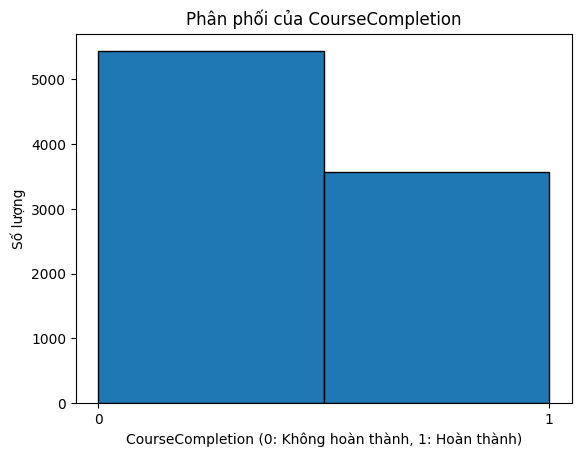

In [12]:
plt.hist(df['CourseCompletion'], bins=2, edgecolor='black')
plt.title('Phân phối của CourseCompletion')
plt.xlabel('CourseCompletion (0: Không hoàn thành, 1: Hoàn thành)')
plt.ylabel('Số lượng')
plt.xticks([0, 1])
plt.show()

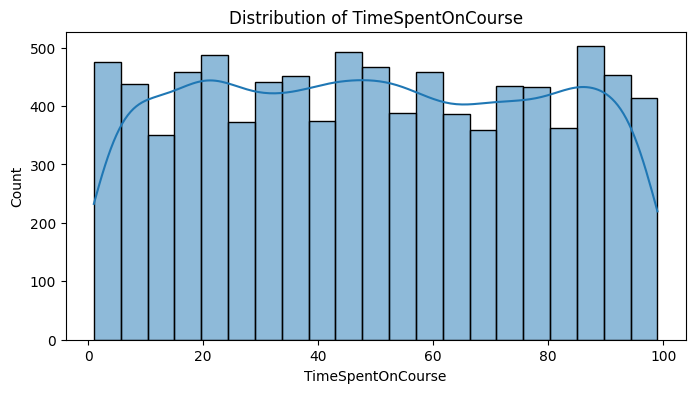

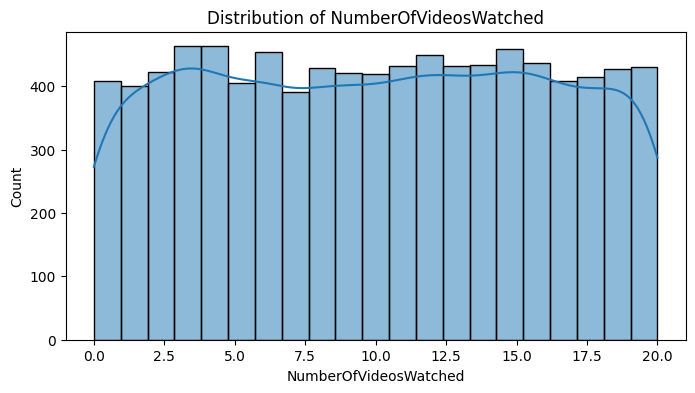

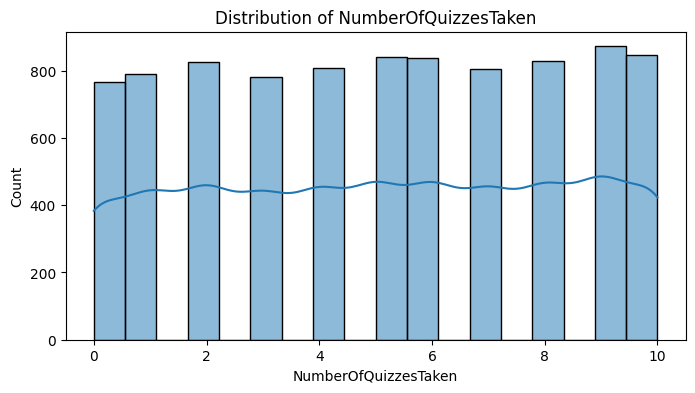

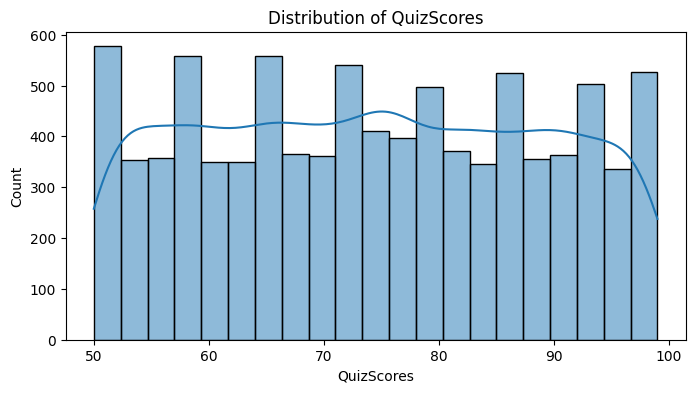

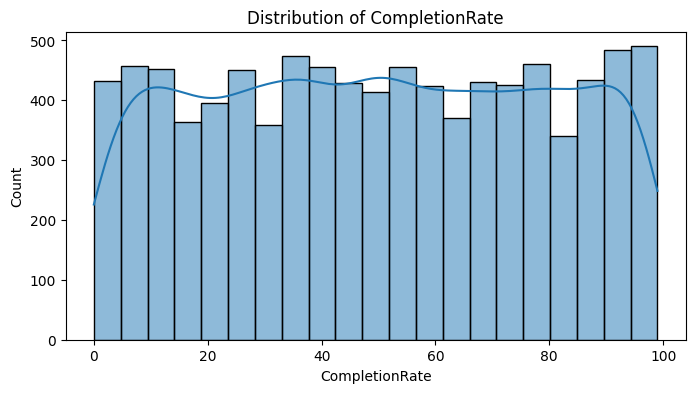

In [ ]:
# Biểu đồ phân phối cho các biến số
numerical_cols = ['TimeSpentOnCourse', 'NumberOfVideosWatched', 'NumberOfQuizzesTaken', 'QuizScores', 'CompletionRate']
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

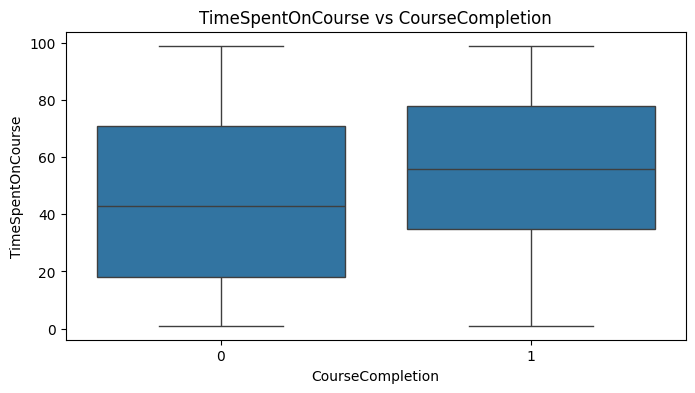

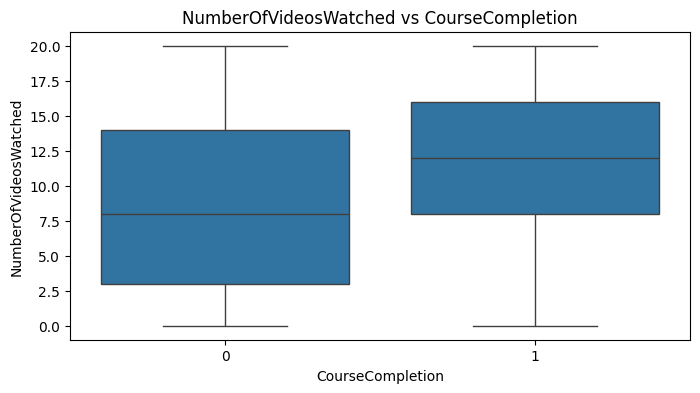

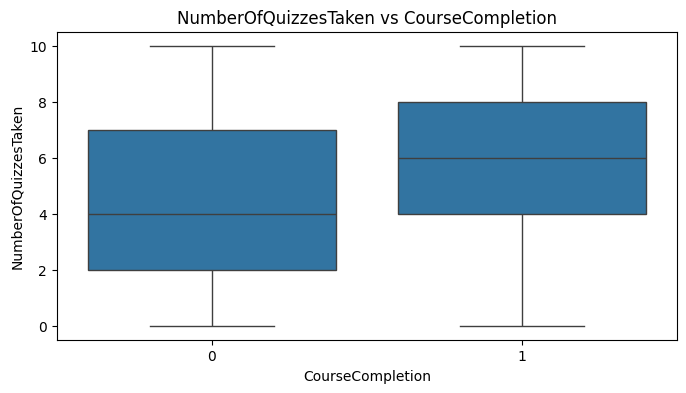

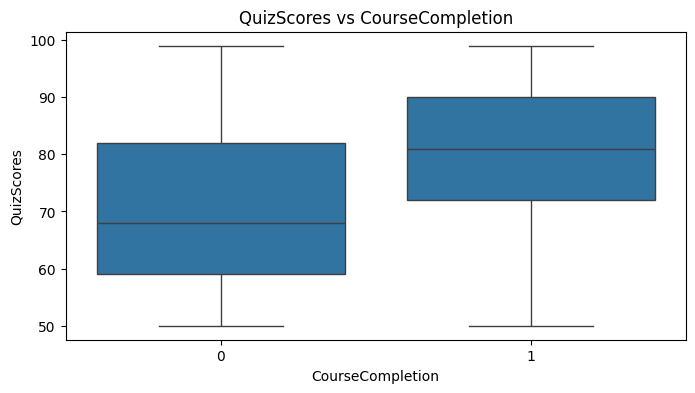

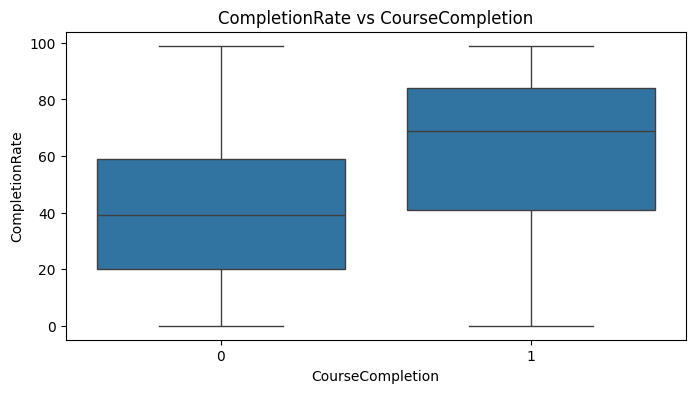

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='CourseCompletion', y=col, data=df)
    plt.title(f'{col} vs CourseCompletion')
    plt.show()

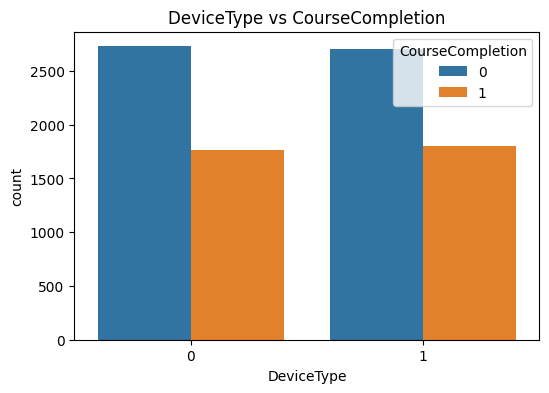

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='DeviceType', hue='CourseCompletion', data=df)
plt.title('DeviceType vs CourseCompletion')
plt.show()

#4. Analysis

In [31]:
# Ma trận tương quan
corr_matrix = df[['TimeSpentOnCourse', 'NumberOfVideosWatched', 'NumberOfQuizzesTaken', 'QuizScores', 'CompletionRate', 'DeviceType', 'CourseCompletion']].corr()
corr_matrix

,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
TimeSpentOnCourse,1.000000,0.019833,-0.012562,-0.006152,0.020934,0.004144,0.182553
NumberOfVideosWatched,0.019833,1.000000,-0.020059,-0.017497,0.016257,0.007403,0.234360
NumberOfQuizzesTaken,-0.012562,-0.020059,1.000000,-0.012295,0.006892,0.015973,0.284504
QuizScores,-0.006152,-0.017497,-0.012295,1.000000,-0.012303,0.004225,0.299983
CompletionRate,0.020934,0.016257,0.006892,-0.012303,1.000000,-0.004767,0.326139
DeviceType,0.004144,0.007403,0.015973,0.004225,-0.004767,1.000000,0.007551
CourseCompletion,0.182553,0.234360,0.284504,0.299983,0.326139,0.007551,1.000000


**Key insights:**
1. Tỷ lệ hoàn thành (CompletionRate) và Hoàn thành khóa học (CourseCompletion):
  - Hệ số Correlation: 0,326139
  - Điều này cho thấy rằng những người có tỷ lệ hoàn thành cao hơn có nhiều khả năng hoàn thành khóa học hơn.
2. Điểm bài kiểm tra (QuizScores) và Hoàn thành khóa học (CourseCompletion):
  - Hệ số Correlation: 0,299983
  - Điểm bài kiểm tra cao hơn có thể chỉ ra sự tham gia lớn hơn và sự hiểu biết tốt hơn về tài liệu khóa học, dẫn đến tỷ lệ hoàn thành cao hơn.
3. Số lượng bài kiểm tra đã làm (NumberOfQuizzesTaken) và Hoàn thành khóa học (CourseCompletion):
  - Hệ số Correlation: 0,284504
  - Nhiều bài kiểm tra đã làm hơn có thể cho thấy sự tham gia tích cực hơn vào khóa học.
4. Số lượng video đã xem (NumberOfVideosWatched) và Hoàn thành khóa học (CourseCompletion):
  - Hệ số Correlation:0,234360
  - Xem nhiều video hơn có thể chỉ ra sự quan tâm cao hơn đến tài liệu khóa học.
5. Thời gian dành cho khóa học (TimeSpentOnCourse) và Hoàn thành khóa học (CourseCompletion):
  - Hệ số Correlation: 0,182553
  - Điều này cho thấy rằng thời gian dành cho khóa học có thể là một yếu tố, nhưng nó không phải là yếu tố dự đoán mạnh mẽ về việc hoàn thành khóa học.


**Đặt giả định cho biến DeviceType và kiểm định**

In [14]:
from statsmodels.formula.api import ols

# Kiểm tra xem DeviceType có phải là biến phân loại không
print(df['DeviceType'].unique())

# Nếu DeviceType không phải là biến phân loại, hãy chuyển đổi nó
df['DeviceType'] = df['DeviceType'].astype('category')

# Thực hiện kiểm định ANOVA
model = ols('CourseCompletion ~ C(DeviceType)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

# Kiểm tra giá trị p
p_value = anova_table['PR(>F)']['C(DeviceType)']
alpha = 0.05

if p_value < alpha:
    print("Có sự khác biệt có ý nghĩa thống kê về tỷ lệ hoàn thành khóa học giữa các loại thiết bị.")
else:
    print("Không có đủ bằng chứng để kết luận có sự khác biệt.")

[1 0]
                    sum_sq      df         F   PR(>F)
C(DeviceType)     0.122786     1.0  0.513072  0.47383
Residual       2153.363436  8998.0       NaN      NaN
Không có đủ bằng chứng để kết luận có sự khác biệt.


Logistic Regression: Xác định các yếu tố trên tác động đến biến CourseComplete:

In [18]:
X = df[['CompletionRate', 'TimeSpentOnCourse', 'NumberOfVideosWatched', 'NumberOfQuizzesTaken', 'QuizScores']]
y = df['CourseCompletion']

In [19]:
# As usual, adding constant term for intercept
X = sm.add_constant(X)
# Fit logistic regression model
model = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.441509
         Iterations 7


In [20]:
# Summary of the model
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:       CourseCompletion   No. Observations:                 9000
Model:                          Logit   Df Residuals:                     8994
Method:                           MLE   Df Model:                            5
Date:                Sat, 22 Mar 2025   Pseudo R-squ.:                  0.3425
Time:                        06:20:18   Log-Likelihood:                -3973.6
converged:                       True   LL-Null:                       -6043.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -11.8411      0.262    -45.197      0.000     -12.355     -11.328
CompletionRate            0.0364      0.001     33.120      0.000       0.034       0.039
TimeSpen

## **Diễn giải mô hình hồi quy logistic:**
**Pseudo R-squ.:** 0.3425
- Mô hình giải thích được 34.25% phương sai của biến phụ thuộc CourseComplete
- Tuy đây là một giá trị thấp, nhưng nó không phải là hiếm trong hồi quy logistic. Nhất là khi dùng để dự đoán kết quả cho hành động của con người.

**LLR p-value:** 0.000
- Cho thấy mô hình có ý nghĩa thống kê
- Các biến độc lập (CompletionRate; TimeSpentOnCourse; NumberOfVideoWatched; NumberOfQuizzesTaken; Quizscoures) có ảnh hưởng đến biến phụ thuộc (CourseCompletion).

**Các biến độc lập và ảnh hưởng của chúng:**

1. const (Hằng số):
  - Hệ số: -11.8411
  - Tỷ lệ Odds: Khoảng 0.0000065
  - Giải thích: Khi tất cả các biến độc lập đều bằng 0, khả năng hoàn thành khóa học là rất thấp.
2. CompletionRate (Tỷ lệ hoàn thành):
  - Hệ số: 0.0364
  - Tỷ lệ Odds: Khoảng 1.037
  - Giải thích: Tỷ lệ hoàn thành tăng 1 đơn vị, khả năng hoàn thành khóa học tăng khoảng 3.7%.
3. TimeSpentOnCourse (Thời gian dành cho khóa học):
  - Hệ số: 0.0204
  - Tỷ lệ Odds: Khoảng 1.021
  - Giải thích: Thời gian dành cho khóa học tăng 1 đơn vị, khả năng hoàn thành khóa học tăng khoảng 2.1%.
4. NumberOfVideosWatched (Số lượng video đã xem):
  - Hệ số: 0.1310
  - Tỷ lệ Odds: Khoảng 1.140
  - Giải thích: Số lượng video đã xem tăng 1 đơn vị, khả năng hoàn thành khóa học tăng khoảng 14%.
5. NumberOfQuizzesTaken (Số lượng bài kiểm tra đã làm):
  - Hệ số: 0.3073
 - Tỷ lệ Odds: Khoảng 1.360
 - Giải thích: Số lượng bài kiểm tra đã làm tăng 1 đơn vị, khả năng hoàn thành khóa học tăng khoảng 36%.
6. QuizScores (Điểm kiểm tra):
  - Hệ số: 0.0724
  - Tỷ lệ Odds: Khoảng 1.075
  - Giải thích: Điểm kiểm tra tăng 1 đơn vị, khả năng hoàn thành khóa học tăng khoảng 7.5%.

Tổng kết:
1. Model fit:
- Pseudo R-squared: 0.3425. Giá trị này cho thấy mô hình giải thích được khoảng 34.25% sự biến thiên của biến phụ thuộc "CourseCompletion" (Hoàn thành khóa học). Mặc dù không quá cao, nhưng vẫn cho thấy mô hình có khả năng dự đoán ở mức tương đối.

2. Predictor Insights:
- Mô hình hồi quy logistic cho thấy rằng các yếu tố như tỷ lệ hoàn thành (CompletionRate), thời gian dành cho khóa học (TimeSpentOnCourse), số lượng video đã xem (NumberOfVideosWatched), số lượng bài kiểm tra đã làm (NumberOfQuizzesTaken) và điểm kiểm tra (QuizScores) đều có ảnh hưởng tích cực đến khả năng hoàn thành khóa học. Trong đó, số lượng bài kiểm tra đã làm và số lượng video đã xem có ảnh hưởng lớn nhất.

3. Conclusion (Kết luận):
- Số lượng bài kiểm tra đã làm (NumberOfQuizzesTaken) có ảnh hưởng lớn nhất, tiếp theo là số lượng video đã xem (NumberOfVideosWatched). Điều này cho thấy việc tương tác tích cực với nội dung khóa học, đặc biệt là thông qua việc làm bài kiểm tra, đóng vai trò quan trọng trong việc hoàn thành khóa học..

**Prediction with logistic regression**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [23]:
model = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.442549
         Iterations 7


In [24]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:       CourseCompletion   No. Observations:                 7200
Model:                          Logit   Df Residuals:                     7194
Method:                           MLE   Df Model:                            5
Date:                Sat, 22 Mar 2025   Pseudo R-squ.:                  0.3426
Time:                        06:20:37   Log-Likelihood:                -3186.4
converged:                       True   LL-Null:                       -4846.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -11.9540      0.295    -40.502      0.000     -12.532     -11.376
CompletionRate            0.0359      0.001     29.339      0.000       0.034       0.038
TimeSpen

In [26]:
predictions = model.predict(X_test)
threshold = 0.5
predicted_classes = np.where(predictions > threshold, 1, 0)
predicted_classes

array([0, 0, 0, ..., 1, 1, 1])

In [27]:
val_correct = np.sum(predicted_classes == y_test)
val_correct

np.int64(1456)

In [28]:
val_all = np.size(predicted_classes)
val_all

1800

In [34]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)
y_pred_binary = [1 if p > 0.5 else 0 for p in y_pred]

# Tính toán các chỉ số đánh giá
accuracy = accuracy_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
auc_roc = roc_auc_score(y_test, y_pred)

# In kết quả đánh giá
print(f'Accuracy: {accuracy}')
print(f'F1-score: {f1}')
print(f'AUC-ROC: {auc_roc}')

Accuracy: 0.8088888888888889
F1-score: 0.7436661698956781
AUC-ROC: 0.8703911492258847


1. **Accuracy = 0.8088888888888889**: Mô hình có độ chính xác khá tốt (khoảng 80.89%).
2. **AUC-ROC = 0.8703911492258847**: Khả năng phân biệt giữa các lớp của mô hình cũng tốt (AUC-ROC khoảng 0.8704).
3. **F1-score = 0.7436661698956781:** Điểm F1 cho thấy sự cân bằng tương đối tốt giữa precision và recall.

#5. Visualization

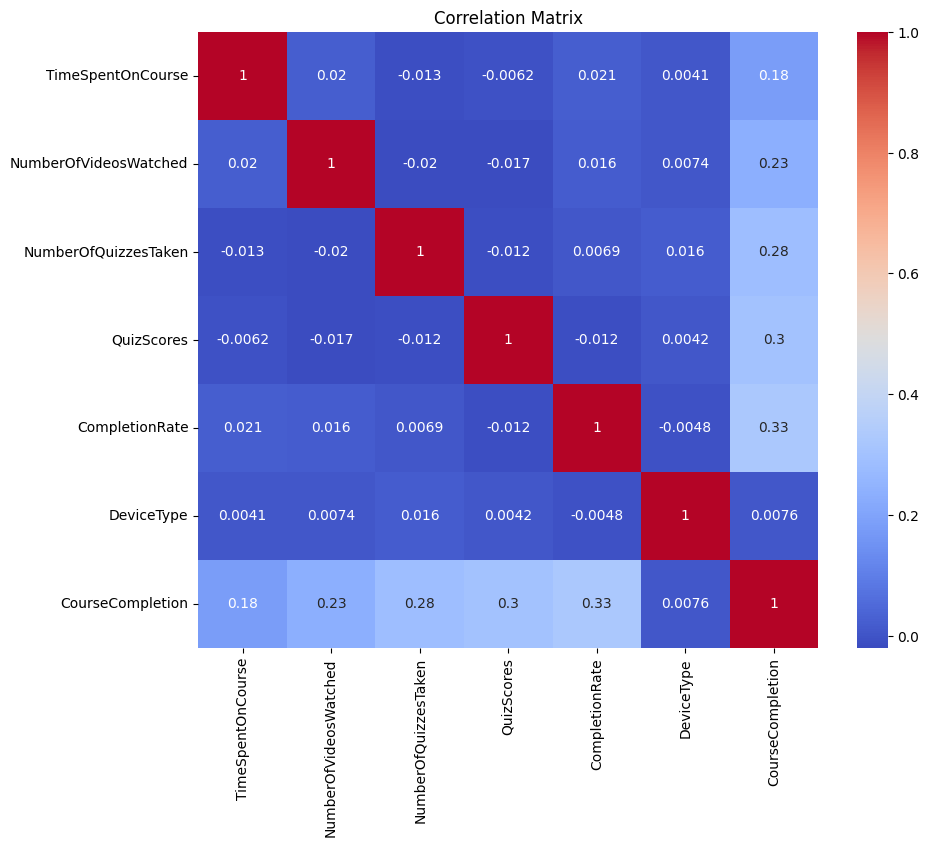

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

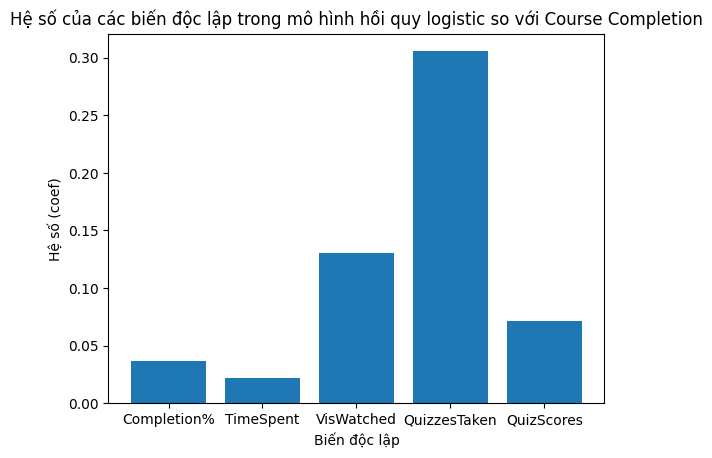

In [33]:
variables = ['Completion%', 'TimeSpent', 'VisWatched', 'QuizzesTaken', 'QuizScores']
coef = [0.0363, 0.0217, 0.1306, 0.3056, 0.0715]

plt.bar(variables, coef)
plt.xlabel('Biến độc lập')
plt.ylabel('Hệ số (coef)')
plt.title('Hệ số của các biến độc lập trong mô hình hồi quy logistic so với Course Completion')
plt.show()

In [35]:
data = df

df = pd.DataFrame(data)
df.to_csv('Output.csv', index=False, encoding='utf-8')

print("File CSV đã được tạo thành công.")

File CSV đã được tạo thành công.
